In [1]:
!pip install compress_pickle

/bin/bash: /home/t/miniconda3/envs/deep/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [2]:
import matplotlib.pyplot as plt
import random, time
import os
import tensorflow as tf
from sklearn.metrics.pairwise import cosine_similarity
import pickle
from pathlib import Path
import numpy as np
from funcyou.utils import dir_walk, printt
from tqdm import tqdm
from collections import OrderedDict
from functools import cache
import compress_pickle 
import concurrent

2023-07-08 18:28:36.250646: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 18:28:37.439330: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
tf.keras.__version__

'2.12.0'

In [4]:
# !git clone https://github.com/tikendraw/funcyou.git -q
# !pip install funcyou/. -q

In [5]:
IMG_SIZE = 299
BATCH_SIZE = 32

In [6]:
dir_walk('.',exclude = ['funcyou'])

,directory,base,folders,video,music,photos,application/zip,documents,others,total files
0,.,.,5,0,0,0,1,5,3,9
1,./ddd,ddd,2,0,0,557,0,0,0,557
2,./ddd/jj,jj,0,0,0,56,0,0,0,56
3,./ddd/test,test,0,0,0,11,0,0,0,11
4,./ddd (copy),ddd (copy),0,0,0,1151,0,0,0,1151
5,./__pycache__,__pycache__,0,0,0,0,0,0,0,1
6,./test,test,0,0,0,12,0,0,0,12


In [7]:
model = tf.keras.applications.InceptionV3(
    weights="imagenet",
    include_top=False,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classifier_activation="softmax",

)

model1 = tf.keras.applications.EfficientNetV2S(
    include_top=False,
    weights="imagenet",
    classifier_activation="softmax",
    include_preprocessing=True
)

model2 = tf.keras.applications.EfficientNetB7(
    include_top=False,
    weights="imagenet",
    classifier_activation="softmax",
)



# mobilenet-large
model3 =tf.keras.applications.MobileNetV3Large(
    input_shape=None,
    alpha=1.0,
    minimalistic=False,
    include_top=False,
    weights="imagenet",
    classifier_activation="softmax",
    include_preprocessing=True,
)

model5 = tf.keras.applications.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classifier_activation="softmax",
)

model4 = tf.keras.applications.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

2023-07-08 18:28:41.744589: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-08 18:28:41.928975: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-08 18:28:41.929479: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [8]:
model.trainable = False
model.compile()

model1.trainable = False
model1.compile()

model2.trainable = False
model2.compile()

model3.trainable = False
model3.compile()

model4.trainable = False
model4.compile()

model5.trainable = False
model5.compile()

In [9]:
# model3.summary()

In [10]:
print(model.output_shape)
print(model1.output_shape)
print(model2.output_shape)
print(model3.output_shape)                      # multiply_19
print(model4.output_shape)
print(model5.output_shape)

(None, None, None, 2048)
(None, None, None, 1280)
(None, None, None, 2560)
(None, None, None, 960)
(None, 1000)
(None, None, None, 1280)


In [11]:
IMG_SIZE = 299
BATCH_SIZE = 32*2

In [12]:
test_image = [str((Path('.')/'test'/i).absolute()) for i in os.listdir(Path('test'))]
test_image

['/home/t/aproject/reverse-image-search/test/PXL_20230126_174402976.jpg',
 '/home/t/aproject/reverse-image-search/test/PXL_20220626_103413694.jpg',
 '/home/t/aproject/reverse-image-search/test/PXL_20220802_102541257.jpg',
 '/home/t/aproject/reverse-image-search/test/PXL_20230227_173443515.jpg',
 '/home/t/aproject/reverse-image-search/test/PXL_20221219_183641687.jpg',
 '/home/t/aproject/reverse-image-search/test/PXL_20230126_100511750.jpg',
 '/home/t/aproject/reverse-image-search/test/PXL_20221222_100014875.jpg',
 '/home/t/aproject/reverse-image-search/test/PXL_20221223_100351655.jpg',
 '/home/t/aproject/reverse-image-search/test/PXL_20220913_181556395.jpg',
 '/home/t/aproject/reverse-image-search/test/PXL_20220831_182327057.jpg',
 '/home/t/aproject/reverse-image-search/test/PXL_20220713_084639696.jpg',
 '/home/t/aproject/reverse-image-search/test/PXL_20220526_184920403.jpg']

In [44]:
i = load_image(test_image[4])
i.shape

TensorShape([299, 299, 3])

In [46]:
oi = model3(tf.expand_dims(i,0))
print(oi.shape)

(1, 9, 9, 960)


In [47]:
oiless = tf.keras.layers.GlobalAveragePooling2D()(oi)
oiless.shape

TensorShape([1, 960])

# Make class

In [52]:


def load_image(x):
    image_data = tf.io.read_file(x)
    image_features = tf.image.decode_jpeg(image_data, channels=3)
    image_features = tf.image.resize(image_features, (IMG_SIZE, IMG_SIZE))
    # image_features = tf.keras.applications.inception_v3.preprocess_input(image_features)
    return image_features

def get_vectors(image_data: tf.data.Dataset) -> np.array:
    features = []
    for i in tqdm(image_data):
        batch = tf.shape(i)[0]
        y = model1(i)
        print('y: ', y.shape)
        y = tf.keras.layers.GlobalAveragePooling2D()(y).numpy().reshape((batch, -1))
        print('y.globab:', y.shape)
        y = y.tolist()
        features.append(y)
    image_features = [np.array(i) for i in features]
    ifeatures = np.concatenate(image_features, axis=0)
    print('ifeatures.shape: ',ifeatures.shape)
    return ifeatures

def similar_image(x, lake, image_dict, k=5):
    x = load_image(x)
 
    x_logits = model1(tf.expand_dims(x, 0))
    x_logits = tf.keras.layers.GlobalAveragePooling2D()(x_logitso).numpy().reshape((1, -1)).tolist()
    print('XLOGITS: ', np.array(x_logits).shape)
    x_similarity = cosine_similarity(x_logits, lake).tolist()[0]

    # similar image indices and similarity
    x_sim_idx = np.argsort(x_similarity)[::-1][:k] 
    x_sim_values = sorted(x_similarity, reverse=True)[:k]

    keys_at_indices = [list(image_dict.keys())[index] for index in x_sim_idx]
    return keys_at_indices, x_sim_values

def show_images(x: list, sim_values:list=None,figsize=(20, 10)):
    n_plots = len(x)
    x = [Path(i) for i in x]
    plt.figure(figsize=figsize)
    for num, i in enumerate(x, 1):
        plt.subplot(n_plots, 5, num)
        img = plt.imread(i)
        plt.imshow(img)
        title = f"{i.name}\n({100*sim_values[num-1]:.2f}%)" if sim_values is not None else i.name
        plt.title(title)
        plt.axis(False)
        plt.tight_layout()

def main(x: Path, img_dir: Path, k=5):
    images = os.listdir(img_dir)
    print('Images found:', len(images))
    images = [str((img_dir / i).absolute()) for i in images]
    image_data = (
        tf.data.Dataset.from_tensor_slices(images)
        .map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
        .batch(BATCH_SIZE)
    )
    ifeatures = get_vectors(image_data)
    image_dict = OrderedDict(zip(images, ifeatures))
    x_idx, x_sim = similar_image(str(x.absolute()), ifeatures, image_dict=image_dict, k=k)
    plt.figure(figsize=(5, 5))
    testimg = plt.imread(str(x.absolute()))
    plt.imshow(testimg)
    show_images(x_idx, x_sim)
    return image_dict


In [53]:
idict = main(x = Path(test_image[2]), img_dir = Path('./ddd'), k = 5)

Images found: 559


  0%|                                                                   | 0/9 [00:00<?, ?it/s]2023-07-07 13:10:43.836932: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [559]
	 [[{{node Placeholder/_0}}]]


y:  (64, 10, 10, 1280)


 11%|██████▌                                                    | 1/9 [00:02<00:17,  2.17s/it]

y.globab: (64, 1280)
y:  (64, 10, 10, 1280)


 22%|█████████████                                              | 2/9 [00:03<00:11,  1.60s/it]

y.globab: (64, 1280)
y:  (64, 10, 10, 1280)


 33%|███████████████████▋                                       | 3/9 [00:04<00:08,  1.46s/it]

y.globab: (64, 1280)
y:  (64, 10, 10, 1280)


 44%|██████████████████████████▏                                | 4/9 [00:05<00:06,  1.37s/it]

y.globab: (64, 1280)
y:  (64, 10, 10, 1280)


 56%|████████████████████████████████▊                          | 5/9 [00:07<00:05,  1.34s/it]

y.globab: (64, 1280)


2023-07-07 13:10:51.080092: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at whole_file_read_ops.cc:114 : FAILED_PRECONDITION: /home/t/aproject/reverse-image-search/ddd/jj; Is a directory
2023-07-07 13:10:51.080774: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): FAILED_PRECONDITION: /home/t/aproject/reverse-image-search/ddd/jj; Is a directory
	 [[{{node ReadFile}}]]
 56%|████████████████████████████████▊                          | 5/9 [00:07<00:05,  1.47s/it]


FailedPreconditionError: {{function_node __wrapped__IteratorGetNext_output_types_1_device_/job:localhost/replica:0/task:0/device:CPU:0}} /home/t/aproject/reverse-image-search/ddd/jj; Is a directory
	 [[{{node ReadFile}}]] [Op:IteratorGetNext]

2023-07-07 13:10:52.072133: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at whole_file_read_ops.cc:114 : FAILED_PRECONDITION: /home/t/aproject/reverse-image-search/ddd/test; Is a directory
2023-07-07 13:10:52.072182: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): FAILED_PRECONDITION: /home/t/aproject/reverse-image-search/ddd/test; Is a directory
	 [[{{node ReadFile}}]]


# Class

In [56]:

class ImageSimilarity:
    def __init__(self, img_dir:Path, model, recursive:bool=False, BATCH_SIZE: int = 64, IMG_SIZE:int = 299):
        self.batch_size = BATCH_SIZE
        self.img_size = IMG_SIZE
        self.img_dir = img_dir
        self.image_dict = None
        self.model = model
        self.ifeatures = None
        self.observer = None
        self.recursive = recursive

    def get_image_paths(self, directory_path:Path, recursive:bool = False) -> list:
        image_extensions = ['.jpg', '.jpeg', '.png', '.gif']  # Add more extensions if needed
        image_paths = []
        
        for file_path in directory_path.iterdir():
            if file_path.is_file() and any(file_path.suffix.lower() == ext for ext in image_extensions):
                image_paths.append(str(file_path.absolute()))
    
            elif recursive and file_path.is_dir():
                image_paths.extend(get_image_paths(file_path, recursive))
    
        return image_paths

    def load_image(self, x):
        image_data = tf.io.read_file(x)
        image_features = tf.image.decode_jpeg(image_data, channels=3)
        image_features = tf.image.resize(image_features, (IMG_SIZE, IMG_SIZE))
        # image_features = tf.keras.applications.inception_v3.preprocess_input(image_features)
        return image_features

    def get_vectors(self, image_data: tf.data.Dataset) -> np.array:
        features = []
        for i in tqdm(image_data):
            batch = tf.shape(i)[0]
            y = self.model(i).numpy()
            y = tf.keras.layers.GlobalMaxPooling2D()(y).numpy().astype('float16').reshape((batch, -1)).tolist()
            features.append(y)

        image_features = [np.array(i) for i in features]
        ifeatures = np.concatenate(image_features, axis=0)
        # print('ifeatures.shape: ',ifeatures.shape)
        return ifeatures

    def similar_image(self, x, k=5):
        if self.image_dict is None:
            raise ValueError("Image features have not been generated. Call `build_image_features()` first.")

        x = self.load_image(x)
        x_logits = self.model(tf.expand_dims(x, 0))
        x_logits = tf.keras.layers.GlobalAveragePooling2D()(x_logits).numpy().astype('float16').reshape((1, -1)).tolist()
        
        x_similarity = cosine_similarity(x_logits, self.ifeatures).tolist()[0]

        # similar image indices and similarity
        x_sim_idx = np.argsort(x_similarity)[::-1][:k]
        x_sim_values = sorted(x_similarity, reverse=True)[:k]
        keys_at_indices = [list(self.image_dict.keys())[index] for index in x_sim_idx]
        return keys_at_indices, x_sim_values

    
    def show_images(self, x: list,similar:list=None, figsize=None):
        n_plots = len(x)
    
        if figsize is None:
            figsize = (20, int(n_plots//5)*4)
            # figsize = (20,10)
        plt.figure(figsize=figsize)
    
        x = [Path(i) for i in x]
        for num, i in enumerate(x, 1):
            plt.subplot((n_plots//5)+1, 5, num)
            img = plt.imread(i)
            plt.imshow(img)
            title = f"{i.name}\n({100*similar[num-1]:.2f}%)" if similar is not None else i.name
            plt.title(title)
            plt.axis(False)
            plt.tight_layout()
        plt.show()

    def build_image_features(self ):
        images = self.get_image_paths(self.img_dir, recursive = self.recursive)
        print('Images found:', len(images))
        
        image_data = (
            tf.data.Dataset.from_tensor_slices(images)
            .map(self.load_image, num_parallel_calls=tf.data.AUTOTUNE)
            .batch(self.batch_size)
        )
        filename = 'image_dict.lzma'
        if os.path.isfile(filename):
            image_dict = compress_pickle.load(filename, compression="lzma")
            if images==list(image_dict.keys()):
                self.image_dict = image_dict
                self.ifeatures = np.array(list(image_dict.values()))
            else:
                self.ifeatures = self.get_vectors(image_data)

            print('ifeatures.shape: ',self.ifeatures.shape)
            print('features loaded!')
        else:
            self.ifeatures = self.get_vectors(image_data)
            print('self.ifreatures: ',self.ifeatures.shape)
            self.image_dict = OrderedDict(zip(images,self.ifeatures))
            
            compress_pickle.dump(self.image_dict, filename, compression="lzma")
                
    def set_model(self, model):
        self.model = model

    def is_changed(self):
        images = self.get_image_paths(self.img_dir, recursive = self.recursive)
        previous_images =  list(self.image_dict.keys())

        return not (images==previous_images)
        

    def find_similar_images(self, x: Path, k=5):
        if self.image_dict is None:
            self.build_image_features()
        elif self.is_changed():
            self.build_image_features()

        sim_img, x_sim = self.similar_image(str(x.absolute()), k=k)
        plt.figure(figsize=(5, 5))
        testimg = plt.imread(str(x.absolute()))
        plt.imshow(testimg)
        plt.title(f'{x.name}(main)')
        plt.show()
        self.show_images(sim_img, similar=x_sim)
        return x_sim



In [57]:
comp = compickle.compressers.registry.get_known_compressions()
type(comp), comp

NameError: name 'compickle' is not defined

In [22]:
s = {'hello': np.arange(i) for i in range(20000)}

In [24]:
with open('s.pkl', 'wb') as f:
    pickle.dump(s, f)

In [163]:
with open('hello-pickle.pkl', 'wb') as f:
    pickle.dump(s, f)

In [164]:
for i in comp:
    compickle.dump(s, f'hello-{i}', compression=i)

In [165]:
a = compickle.load('hello-lzma.lzma', compression='lzma')

In [169]:
a, a.keys()

({'hello': array([    0,     1,     2, ..., 19996, 19997, 19998])},
 dict_keys(['hello']))

In [167]:
s

{'hello': array([    0,     1,     2, ..., 19996, 19997, 19998])}

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [58]:

# Example usage:
img_dir = Path("./ddd")


# Instantiate the ImageSimilarity class
image_similarity = ImageSimilarity(img_dir,model3, recursive=True)
# Set the model
# model = tf.keras.applications.InceptionV3(include_top=False, weights="imagenet")
# image_similarity.set_model(model)

# Find similar images
similar_images = image_similarity.find_similar_images(Path(test_image[0]), k=10)

# Keep the program running to monitor for changes
# try:
#     while True:
#         time.sleep(1)
# except KeyboardInterrupt:
#     pass


NameError: name 'get_image_paths' is not defined

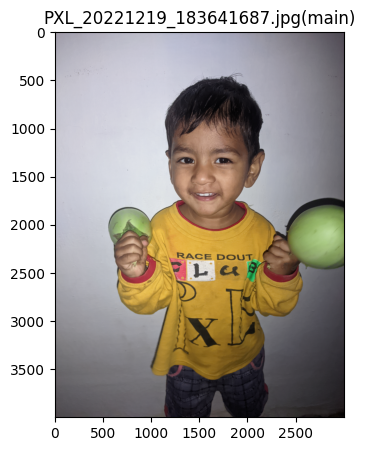

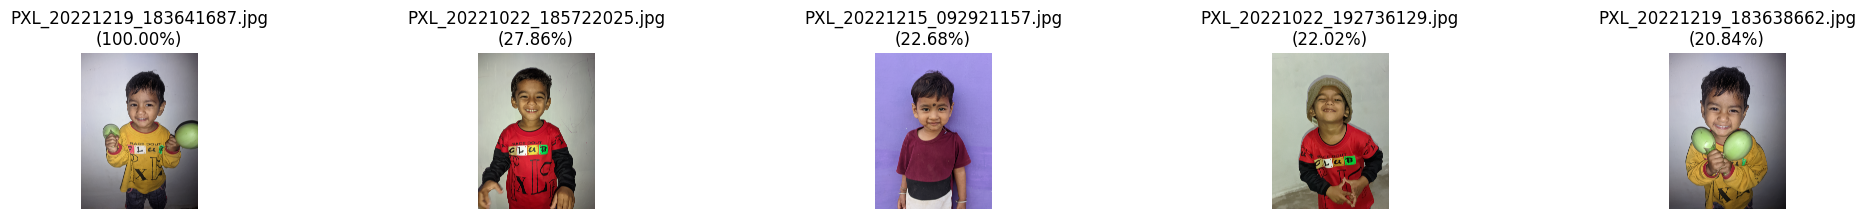

In [178]:
similar_images = image_similarity.find_similar_images(Path(test_image[4]), k=5)

In [16]:
import os
from collections import OrderedDict
from pathlib import Path
import tensorflow as tf
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from tqdm import tqdm
import compress_pickle

class ImageSimilarity:
    def __init__(self, img_dir:Path, recursive: bool = False, BATCH_SIZE: int = 64, IMG_SIZE: int = 224, save_model: bool =True):
        self.batch_size = BATCH_SIZE
        self.img_size = IMG_SIZE
        self.img_dir = img_dir
        self.model = tf.keras.applications.MobileNetV2(
                                                input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                                alpha=1.0,
                                                include_top=False,
                                                weights="imagenet",
                                                input_tensor=None,
                                                pooling=None,
                                                classifier_activation="softmax",
                                            )
        self.save_model=save_model
        self.recursive = recursive
        self.ifeatures = None
        self.filename = 'image_dict.lzma'
        self.image_dict = None
                
    def get_image_paths(self, directory_path: Path, recursive: bool = False) -> list:
        image_extensions = ['.jpg', '.jpeg', '.png']  # Add more extensions if needed
        image_paths = []
        
        for file_path in directory_path.iterdir():
            if file_path.is_file() and any(file_path.suffix.lower() == ext for ext in image_extensions):
                image_paths.append(str(file_path.absolute()))
    
            elif recursive and file_path.is_dir():
                image_paths.extend(self.get_image_paths(file_path, recursive))
    
        return image_paths

    def load_image(self, x):
        image_data = tf.io.read_file(x)
        image_features = tf.image.decode_jpeg(image_data, channels=3)
        image_features = tf.image.resize(image_features, (self.img_size, self.img_size))
        return image_features

    
    def get_vectors(self, image_data: tf.data.Dataset) -> np.array:
        features = []
        for i in tqdm(image_data):
            y = self.model(i)
            pooled_features = tf.keras.layers.GlobalMaxPooling2D()(y)
            features.append(pooled_features)

        ifeatures = tf.concat(features, axis=0)
        ifeatures = tf.cast(ifeatures, tf.float16).numpy()
        return ifeatures

    def similar_image(self, x, k=5):
    
        x = self.load_image(x)
        x_logits = self.model(tf.expand_dims(x, 0))
        x_logits = tf.keras.layers.GlobalAveragePooling2D()(x_logits).numpy().astype('float16').reshape((1, -1)).tolist()
        
        x_similarity = cosine_similarity(x_logits, self.ifeatures).tolist()[0]

        x_sim_idx = np.argsort(x_similarity)[::-1][:k]
        x_sim_values = sorted(x_similarity, reverse=True)[:k]
        keys_at_indices = [list(self.image_dict.keys())[index] for index in x_sim_idx]
        return keys_at_indices, x_sim_values

    def build_image_features(self):
        images = self.get_image_paths(self.img_dir, recursive=self.recursive)

        image_data = (
            tf.data.Dataset.from_tensor_slices(images)
            .map(self.load_image, num_parallel_calls=tf.data.AUTOTUNE) 
            .batch(self.batch_size)
        )

        self.ifeatures = self.get_vectors(image_data)
        self.image_dict = OrderedDict(zip(images, self.ifeatures))

        # print('ifeatures.shape:', self.ifeatures.shape)
        # print('Features loaded!')

    def load_image_dict(self):
        if os.path.isfile(self.filename):
            image_dict = compress_pickle.load(self.filename, compression="lzma")
            images = self.get_image_paths(self.img_dir, recursive=self.recursive)
            if images == list(image_dict.keys()):
                self.image_dict = image_dict
                self.ifeatures = np.array(list(image_dict.values()))
            else:
                self.build_image_features()
        else:
            self.build_image_features()
    
    
    def save_image_dict(self):
        compress_pickle.dump(self.image_dict, self.filename, compression= "lzma")
        

    def is_changed(self):
        images = self.get_image_paths(self.img_dir, recursive=self.recursive)
        previous_images = list(self.image_dict.keys())
        return not (images == previous_images)

    
    def find_similar_images(self, x: Path, k=5):
        # creating/loading vectors
        self.load_image_dict()
        
        sim_img, x_sim = self.similar_image(str(x.absolute()), k=k)
        # print('plotting')
        plt.figure(figsize=(5, 5))
        testimg = plt.imread(str(x.absolute()))
        plt.imshow(testimg)
        plt.title(f'{x.name}(main)')
        plt.show()
        self.show_images(sim_img, similar=x_sim)
        return x_sim
    
    
    def show_images(self, x: list, similar: list = None, figsize=None):
        n_plots = len(x)
        # print('n plots: ', n_plots)
        if figsize is None:
            figsize = (20, int(n_plots // 5) * 4) if n_plots>4 else (20,5)
        
        # print('figsize: ',figsize)
        plt.figure(figsize=figsize)
    
        x = [Path(i) for i in x]
        for num, i in enumerate(x, 1):
            plt.subplot((n_plots // 5) + 1, 5, num)
            img = plt.imread(i)
            plt.imshow(img)
            title = f"{i.name}\n({100 * similar[num - 1]:.2f}%)" if similar is not None else i.name
            plt.title(title)
            plt.axis(False)
            plt.tight_layout()
        
        plt.show()
    
    def __call__(self, x, k=5):

        with concurrent.futures.ThreadPoolExecutor() as executor:
            finding = executor.submit(self.find_similar_images(x, k=5))
            
            if self.save_model:
                if self.is_changed() or (not Path(self.filename).exists()):
                    # print('saving model...')
                    save_imagedict = executor.submit(self.save_image_dict)
                # print('Done')

        



In [17]:
image_similarity = ImageSimilarity(Path('./ddd'), recursive=True, save_model=True)

2023-07-08 18:57:22.099226: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36000000 exceeds 10% of free system memory.
2023-07-08 18:57:22.193870: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36000000 exceeds 10% of free system memory.


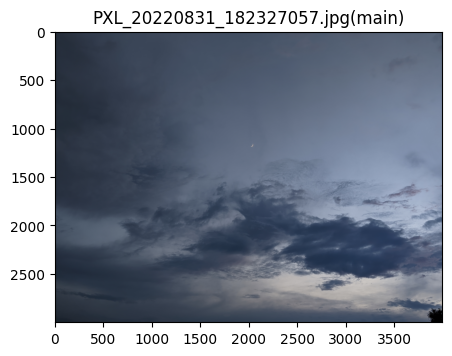

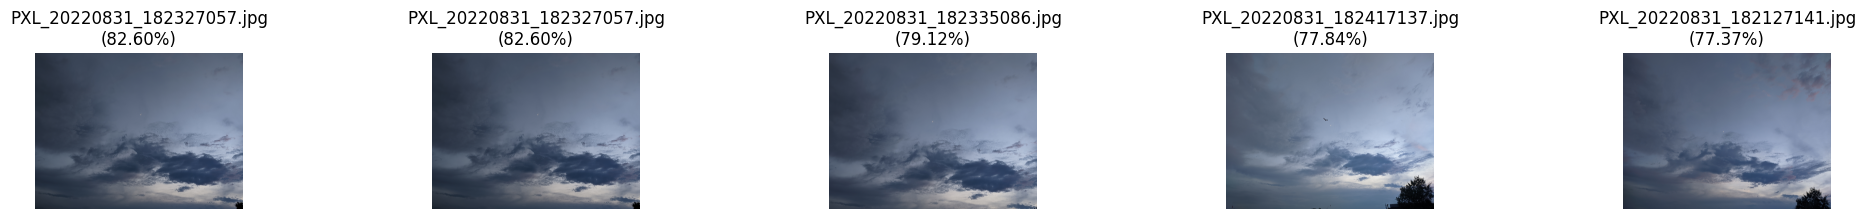

Took:  6.330512341000031 sec


In [18]:
start = time.perf_counter()
similar_images = image_similarity(Path(test_image[9]), k=5)
print('Took: ',time.perf_counter()-start, 'sec')